# FER2013 Dataset

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

Dataset link: https://www.kaggle.com/datasets/deadskull7/fer2013 (csv)

https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer (images)

# EDA

Exploratory Data Analysis (EDA) is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations. 

## EDA using images

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!mkdir dataset
!unzip -FF 'gdrive/MyDrive/dataset/dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
from google.colab.patches import cv2_imshow
from skimage import io

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import glob
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

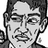

In [ ]:
img_path = "dataset/test/angry/im0.png"
img = io.imread(img_path)
cv2_imshow(img)


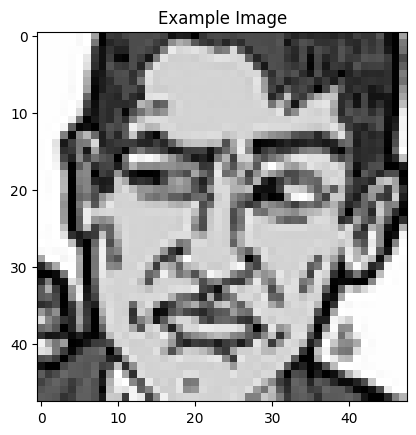

Image height: 48
Image width: 48
Mean pixel value: 143.83289930555554
Standard deviation of pixel values: 81.35375497717173
Minimum pixel value: 0
Maximum pixel value: 255


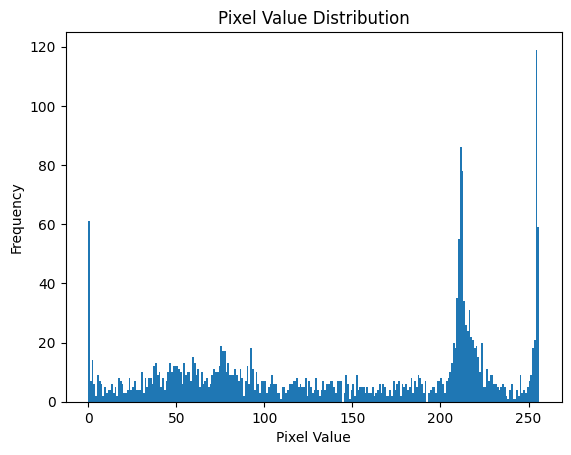

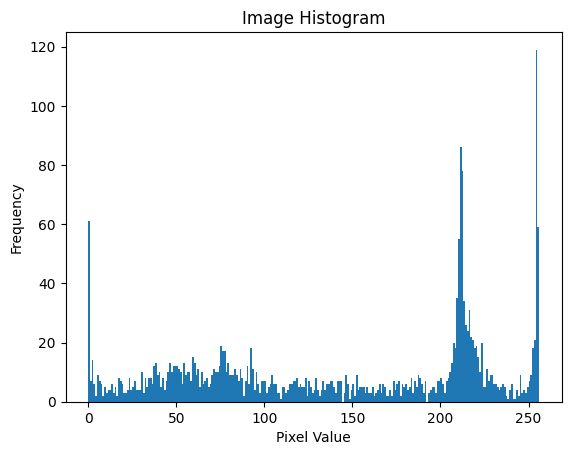

In [ ]:
# Load and display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Example Image')
plt.show()

# Compute image properties
height, width = img.shape
print('Image height:', height)
print('Image width:', width)

# Compute image statistics
mean_pixel = np.mean(img)
std_pixel = np.std(img)
min_pixel = np.min(img)
max_pixel = np.max(img)
print('Mean pixel value:', mean_pixel)
print('Standard deviation of pixel values:', std_pixel)
print('Minimum pixel value:', min_pixel)
print('Maximum pixel value:', max_pixel)

# Display pixel value distribution
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Display image histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.hist(img.ravel(),256,[0,256])
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


Number of images: 7215


<ipython-input-15-f9c26bd6954e>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sum_img = np.zeros(cv2.imread(img_files[0]).shape, np.float)


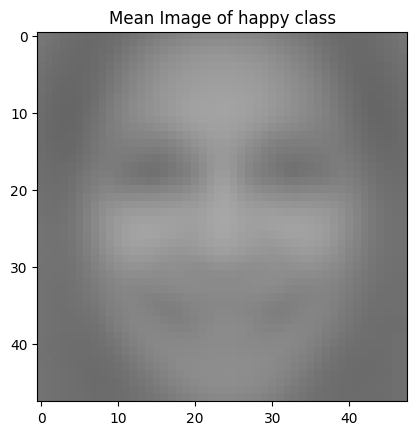

In [ ]:
# Define image directory and extension
img_dir = 'dataset/train/happy/'
img_ext = '*.png'

# Load images
img_files = glob.glob(img_dir + img_ext)
print('Number of images:', len(img_files))

# Compute mean image
sum_img = np.zeros(cv2.imread(img_files[0]).shape, np.float)
for img_file in img_files:
    img = cv2.imread(img_file)
    sum_img += img
mean_img = sum_img / len(img_files)
mean_img = np.uint8(mean_img)

# Display mean image
plt.imshow(cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB))
plt.title('Mean Image of happy class')
plt.show()


## EDA using csv

0- anger
1- disgust
2- fear
3- happy
4- sad
5- surprised
6- neutral

In [ ]:
dataset = pd.read_csv('gdrive/MyDrive/emotion.csv')

In [ ]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
dataset.shape

(35887, 3)

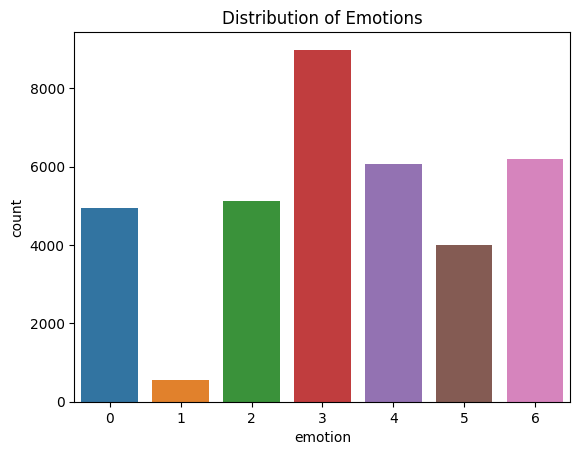

In [ ]:
sns.countplot(x="emotion", data=dataset)
plt.title('Distribution of Emotions')
plt.show()

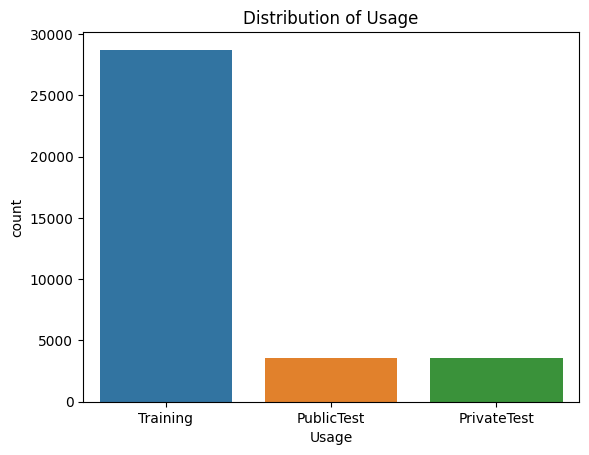

In [ ]:
sns.countplot(x="Usage", data=dataset)
plt.title('Distribution of Usage')
plt.show()

## Data Preprocessing

Data preprocessing, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process.

Here we convert the string type of data into float for easy processing of data by the following algorithms

In [ ]:
dataset.dtypes

emotion     int64
pixels     object
Usage      object
dtype: object

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]
target=[]
data=[]
for ind in dataset.index:
  temp=dataset['pixels'][ind].split()
  temp=np.array(temp, dtype=float)
  data.append(temp)
  target.append(dataset['emotion'][ind])
  if(dataset['Usage'][ind]=='Training'):
    y_train.append(dataset['emotion'][ind])
    X_train.append(temp)
  else:
    y_test.append(dataset['emotion'][ind])
    X_test.append(temp)

In [ ]:
len(data)

35887

In [ ]:
X_train[:10]

[array([ 70.,  80.,  82., ..., 106., 109.,  82.]),
 array([151., 150., 147., ..., 193., 183., 184.]),
 array([231., 212., 156., ...,  88., 110., 152.]),
 array([ 24.,  32.,  36., ..., 142., 143., 142.]),
 array([ 4.,  0.,  0., ..., 30., 29., 30.]),
 array([55., 55., 55., ..., 34., 30., 57.]),
 array([ 20.,  17.,  19., ...,  99., 107., 118.]),
 array([ 77.,  78.,  79., ..., 125.,  67.,  68.]),
 array([85., 84., 90., ..., 58., 73., 84.]),
 array([255., 254., 255., ..., 254., 255., 255.])]

In [ ]:
y_train[:10]

[0, 0, 2, 4, 6, 2, 4, 3, 3, 2]

# CNN

## Importing libraries

In [ ]:
from IPython.display import clear_output
!pip install tf_explain
! pip install segmentation-models
clear_output()
from tf_explain.core.grad_cam import GradCAM


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
%matplotlib inline

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Flatten, Dense, Reshape, Multiply, Add,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
import re
import gc
import glob
import itertools
from sklearn.metrics import confusion_matrix
from collections import Counter

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import roc_curve, auc, multilabel_confusion_matrix


import keras.backend as K
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator


##General Parameters

In [ ]:
batch_size = 128
epochs = 50
pic_size = 48
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
!mkdir dataset
!unzip -FF 'gdrive/MyDrive/dataset/dataset.zip'

mkdir: cannot create directory ‘dataset’: File exists
unzip:  cannot find or open gdrive/MyDrive/dataset/dataset.zip, gdrive/MyDrive/dataset/dataset.zip.zip or gdrive/MyDrive/dataset/dataset.zip.ZIP.


In [ ]:
folder_path = "images/"

In [ ]:
def plot_exp(expression):
    plt.style.use('dark_background')
    plt.figure(figsize= (12,12))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img)   
    plt.show()

In [ ]:
def walk_data(mydict, folder_path):
    for (root,dirs,files) in os.walk(folder_path, topdown=False):
        if len(files)>0:
            mydict[root]=len(files)

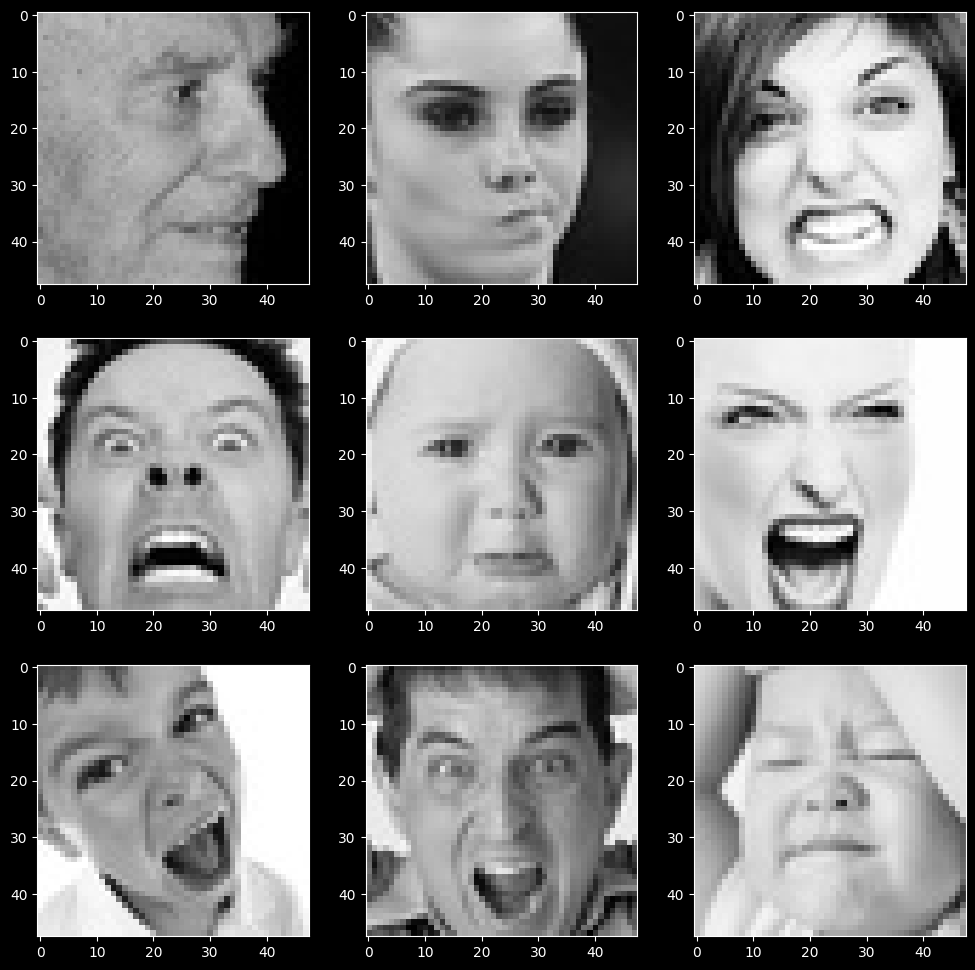

In [ ]:
plot_exp('angry')

In [ ]:
train_dict = dict()
val_dict = dict()
walk_data(train_dict, folder_path + "train/")
walk_data(val_dict, folder_path + "validation/")

In [ ]:
def fix_keys(mydict):
    new_dict = dict()
    for k, v in mydict.items():
        new_k = k.split('/')[-1]
        new_dict[new_k] = v
    return new_dict

In [ ]:
train_dict = fix_keys(train_dict)
val_dict = fix_keys(val_dict)
print(train_dict)
print(val_dict)

{'disgust': 436, 'surprise': 3205, 'happy': 7164, 'neutral': 4982, 'fear': 4103, 'sad': 4938, 'angry': 3993}
{'disgust': 111, 'surprise': 797, 'happy': 1825, 'neutral': 1216, 'fear': 1018, 'sad': 1139, 'angry': 960}


In [ ]:
label_train_dict = {'Expressions':train_dict.keys(), 'Count':train_dict.values}
label_val_dict = {'Expressions':val_dict.keys(), 'Count':val_dict.values}

##Training data Distribution Visualization

In [ ]:
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
def plot_dist(my_dict, data):
    fig = px.bar(x=my_dict.values(),
             y=my_dict.keys(),
             orientation='h',
             color=my_dict.values(),
             title=data + ' Distribution',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.curl,
             template='plotly_dark'
            )
    fig.update_xaxes()
    fig.show()

In [ ]:
plot_dist(train_dict, "Training data")

##Validation Data Distribution Visualization

In [ ]:
plot_dist(val_dict, "Validation data")

##Generating Data in Suitable Format Using ImageDataGenerator

In [ ]:
import collections
datagen_train  = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
datagen_val = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "rgb",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

counter = collections.Counter(train_set.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


##MODEL ARCHITECTURE

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import keras.layers as layers
import numpy as np


class StandardizedConv2D(layers.Conv2D):
    def convolution_op(self, inputs, kernel):
        mean, var = tf.nn.moments(kernel, axes=[0, 1, 2], keepdims=True)
        return tf.nn.conv2d(
            inputs,
            (kernel - mean) / tf.sqrt(var + 1e-10),
            padding="VALID",
            strides=list(self.strides),
            name=self.__class__.__name__,
        )

In [ ]:
# Inputs
input_layer = Input((48,48,3))

# Encoder
f=Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)
f=Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Dropout(rate=0.3)(f)
f=MaxPooling2D(2,2)(f)
#f=BatchNormalization()(f)


f=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(64, kernel_size=5, strides=1, padding='same', activation='relu')(f)
#f=Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Dropout(rate=0.3)(f)
f=MaxPooling2D(2,2)(f)
#f=BatchNormalization()(f)

f=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(f)
#f=Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu', name='Final_Layer1')(f)
f=Dropout(rate=0.3)(f)
f=MaxPooling2D(2,2)(f)
#f=BatchNormalization()(f)

f=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu')(f)
f=Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(f)
#f=Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu', name='Final_Layer')(f)
f=Dropout(rate=0.3)(f)
f=MaxPooling2D(2,2)(f)
#f=BatchNormalization()(f)
                    
f= Flatten()(f)
f=Dropout(rate=0.3)(f)
#f=BatchNormalization()(f)
f=Dense(512, activation='relu')(f)
f=Dropout(rate=0.3)(f)
#f=BatchNormalization()(f)
output_layer=Dense(7, activation='softmax')(f)

# Model
model = Model(
    inputs=[input_layer],
    outputs=[output_layer]
)

###SUMMARY OF THE MODEL

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                             

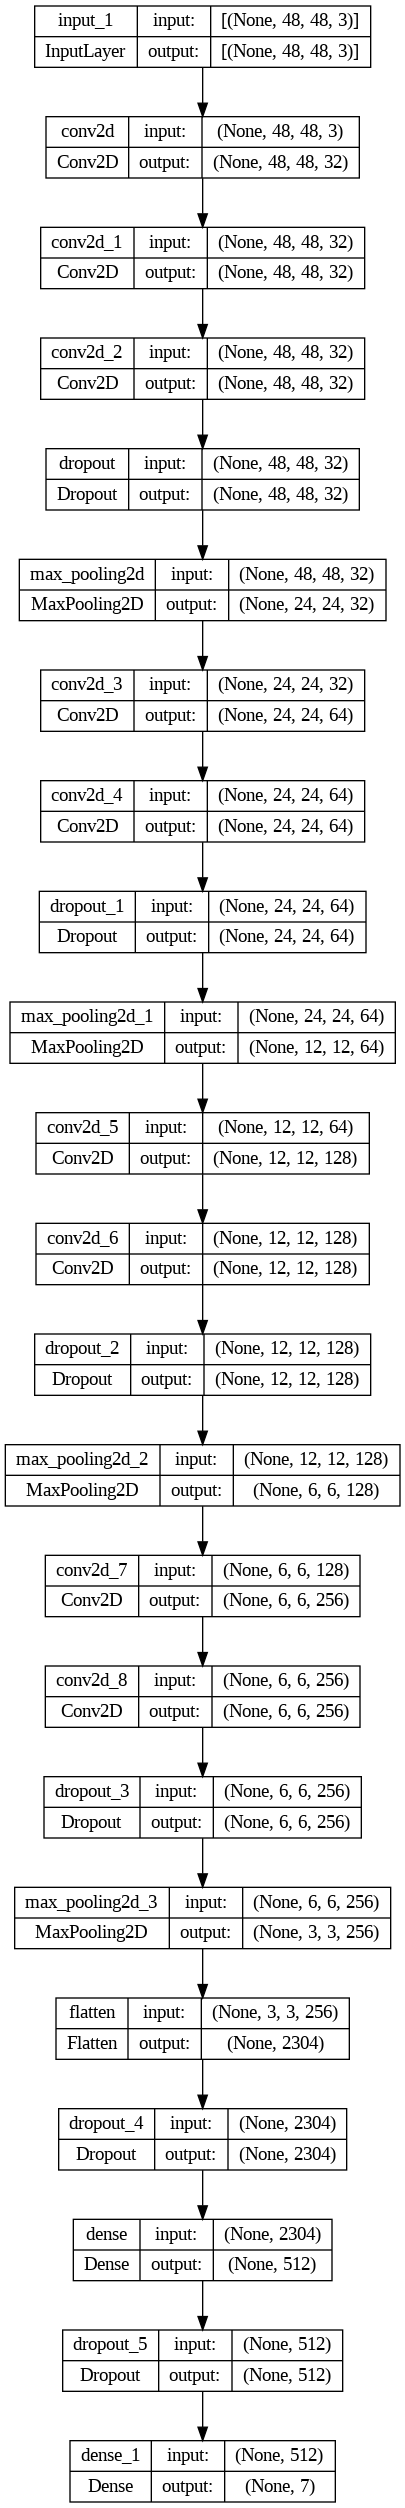

In [ ]:
model.summary()

from tensorflow.keras.utils import plot_model
from IPython.display import ImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImageImage

plot_model(model, to_file='model.png', show_shapes=True)
Image("model.png")

In [ ]:
epochs = 50
learning_rate = 1e-3
opt = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [ModelCheckpoint('model.hdf5',monitor="val_accuracy", verbose=1, save_best_only=True),
            ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, min_lr=1e-6),
            #ShowProgress(),
            EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=15)]

###FITTING THE MODEL 

In [ ]:
history = model.fit(train_set, 
                    validation_data = test_set,
                    class_weight=class_weights,
                    epochs = epochs,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                   validation_steps = test_set.n//test_set.batch_size,
                    callbacks = callbacks,
                    # shuffle=True,
                   verbose=1)

Epoch 1/50
225/225 [==============================] - 30s 128ms/step - loss: 3.6080 - accuracy: 0.1321 - val_loss: 1.9530 - val_accuracy: 0.0497

Epoch 00001: val_accuracy improved from -inf to 0.04972, saving model to model.hdf5
Epoch 2/50
225/225 [==============================] - 33s 148ms/step - loss: 3.3607 - accuracy: 0.1573 - val_loss: 1.9099 - val_accuracy: 0.2476

Epoch 00002: val_accuracy improved from 0.04972 to 0.24759, saving model to model.hdf5
Epoch 3/50
225/225 [==============================] - 29s 128ms/step - loss: 3.2900 - accuracy: 0.1888 - val_loss: 1.8586 - val_accuracy: 0.2250

Epoch 00003: val_accuracy did not improve from 0.24759
Epoch 4/50
225/225 [==============================] - 28s 125ms/step - loss: 3.0667 - accuracy: 0.2756 - val_loss: 1.7574 - val_accuracy: 0.3146

Epoch 00004: val_accuracy improved from 0.24759 to 0.31463, saving model to model.hdf5
Epoch 5/50
225/225 [==============================] - 29s 127ms/step - loss: 2.8816 - accuracy: 0.3324 - val_loss: 1.6396 - val_accuracy: 0.3699

Epoch 00005: val_accuracy improved from 0.31463 to 0.36989, saving model to model.hdf5
Epoch 6/50
225/225 [==============================] - 28s 123ms/step - loss: 2.7059 - accuracy: 0.3856 - val_loss: 1.6001 - val_accuracy: 0.3697

Epoch 00006: val_accuracy did not improve from 0.36989
Epoch 7/50
225/225 [==============================] - 28s 124ms/step - loss: 2.5582 - accuracy: 0.4179 - val_loss: 1.5595 - val_accuracy: 0.4101

Epoch 00007: val_accuracy improved from 0.36989 to 0.41009, saving model to model.hdf5
Epoch 8/50
225/225 [==============================] - 28s 126ms/step - loss: 2.4498 - accuracy: 0.4470 - val_loss: 1.4188 - val_accuracy: 0.4581

Epoch 00008: val_accuracy improved from 0.41009 to 0.45810, saving model to model.hdf5
Epoch 9/50
225/225 [==============================] - 28s 125ms/step - loss: 2.3866 - accuracy: 0.4543 - val_loss: 1.4171 - val_accuracy: 0.4726

Epoch 00009: val_accuracy improved from 0.45810 to 0.47259, saving model to model.hdf5
Epoch 10/50
225/225 [==============================] - 28s 123ms/step - loss: 2.2882 - accuracy: 0.4757 - val_loss: 1.3220 - val_accuracy: 0.5033

Epoch 00010: val_accuracy improved from 0.47259 to 0.50327, saving model to model.hdf5
Epoch 11/50
225/225 [==============================] - 28s 126ms/step - loss: 2.2377 - accuracy: 0.4803 - val_loss: 1.3528 - val_accuracy: 0.4940

Epoch 00011: val_accuracy did not improve from 0.50327
Epoch 12/50
225/225 [==============================] - 28s 124ms/step - loss: 2.1901 - accuracy: 0.4880 - val_loss: 1.3110 - val_accuracy: 0.4999

Epoch 00012: val_accuracy did not improve from 0.50327
Epoch 13/50
225/225 [==============================] - 28s 122ms/step - loss: 2.1226 - accuracy: 0.5048 - val_loss: 1.3340 - val_accuracy: 0.4811

Epoch 00013: val_accuracy did not improve from 0.50327

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 14/50
225/225 [==============================] - 28s 124ms/step - loss: 1.9357 - accuracy: 0.5336 - val_loss: 1.2189 - val_accuracy: 0.5341

Epoch 00014: val_accuracy improved from 0.50327 to 0.53409, saving model to model.hdf5
Epoch 15/50
225/225 [==============================] - 28s 124ms/step - loss: 1.8074 - accuracy: 0.5595 - val_loss: 1.2009 - val_accuracy: 0.5413

Epoch 00015: val_accuracy improved from 0.53409 to 0.54134, saving model to model.hdf5
Epoch 16/50
225/225 [==============================] - 28s 124ms/step - loss: 1.7704 - accuracy: 0.5674 - val_loss: 1.1957 - val_accuracy: 0.5456

Epoch 00016: val_accuracy improved from 0.54134 to 0.54560, saving model to model.hdf5
Epoch 17/50
225/225 [==============================] - 28s 126ms/step - loss: 1.7202 - accuracy: 0.5733 - val_loss: 1.1703 - val_accuracy: 0.5588

Epoch 00017: val_accuracy improved from 0.54560 to 0.55881, saving model to model.hdf5
Epoch 18/50
225/225 [==============================] - 31s 140ms/step - loss: 1.6875 - accuracy: 0.5801 - val_loss: 1.1746 - val_accuracy: 0.5585

Epoch 00018: val_accuracy did not improve from 0.55881
Epoch 19/50
225/225 [==============================] - 29s 129ms/step - loss: 1.6404 - accuracy: 0.5909 - val_loss: 1.1531 - val_accuracy: 0.5631

Epoch 00019: val_accuracy improved from 0.55881 to 0.56307, saving model to model.hdf5
Epoch 20/50
225/225 [==============================] - 29s 128ms/step - loss: 1.6128 - accuracy: 0.5982 - val_loss: 1.1469 - val_accuracy: 0.5706

Epoch 00020: val_accuracy improved from 0.56307 to 0.57060, saving model to model.hdf5
Epoch 21/50
225/225 [==============================] - 29s 127ms/step - loss: 1.5689 - accuracy: 0.6060 - val_loss: 1.1444 - val_accuracy: 0.5712

Epoch 00021: val_accuracy improved from 0.57060 to 0.57116, saving model to model.hdf5
Epoch 22/50
225/225 [==============================] - 31s 137ms/step - loss: 1.5458 - accuracy: 0.6136 - val_loss: 1.1307 - val_accuracy: 0.5781

Epoch 00022: val_accuracy improved from 0.57116 to 0.57812, saving model to model.hdf5
Epoch 23/50
225/225 [==============================] - 32s 142ms/step - loss: 1.5042 - accuracy: 0.6229 - val_loss: 1.1298 - val_accuracy: 0.5831

Epoch 00023: val_accuracy improved from 0.57812 to 0.58310, saving model to model.hdf5
Epoch 24/50
225/225 [==============================] - 29s 128ms/step - loss: 1.4930 - accuracy: 0.6274 - val_loss: 1.1320 - val_accuracy: 0.5794

Epoch 00024: val_accuracy did not improve from 0.58310
Epoch 25/50
225/225 [==============================] - 32s 141ms/step - loss: 1.4699 - accuracy: 0.6342 - val_loss: 1.1150 - val_accuracy: 0.5854

Epoch 00025: val_accuracy improved from 0.58310 to 0.58537, saving model to model.hdf5
Epoch 26/50
225/225 [==============================] - 29s 131ms/step - loss: 1.4250 - accuracy: 0.6430 - val_loss: 1.1064 - val_accuracy: 0.5912

Epoch 00026: val_accuracy improved from 0.58537 to 0.59119, saving model to model.hdf5
Epoch 27/50
225/225 [==============================] - 31s 139ms/step - loss: 1.3880 - accuracy: 0.6539 - val_loss: 1.1206 - val_accuracy: 0.5866

Epoch 00027: val_accuracy did not improve from 0.59119
Epoch 28/50
225/225 [==============================] - 31s 139ms/step - loss: 1.3708 - accuracy: 0.6600 - val_loss: 1.0921 - val_accuracy: 0.5973

Epoch 00028: val_accuracy improved from 0.59119 to 0.59730, saving model to model.hdf5
Epoch 29/50
225/225 [==============================] - 30s 135ms/step - loss: 1.3297 - accuracy: 0.6708 - val_loss: 1.1169 - val_accuracy: 0.5862

Epoch 00029: val_accuracy did not improve from 0.59730
Epoch 30/50
225/225 [==============================] - 31s 140ms/step - loss: 1.3190 - accuracy: 0.6723 - val_loss: 1.0947 - val_accuracy: 0.5972

Epoch 00030: val_accuracy did not improve from 0.59730
Epoch 31/50
225/225 [==============================] - 30s 132ms/step - loss: 1.2847 - accuracy: 0.6824 - val_loss: 1.1159 - val_accuracy: 0.5922

Epoch 00031: val_accuracy did not improve from 0.59730

Epoch 00031: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 32/50
225/225 [==============================] - 31s 137ms/step - loss: 1.1882 - accuracy: 0.6974 - val_loss: 1.0847 - val_accuracy: 0.6047

Epoch 00032: val_accuracy improved from 0.59730 to 0.60469, saving model to model.hdf5
Epoch 33/50
225/225 [==============================] - 33s 145ms/step - loss: 1.1603 - accuracy: 0.7107 - val_loss: 1.0835 - val_accuracy: 0.6057

Epoch 00033: val_accuracy improved from 0.60469 to 0.60568, saving model to model.hdf5
Epoch 34/50
225/225 [==============================] - 28s 126ms/step - loss: 1.1478 - accuracy: 0.7120 - val_loss: 1.0827 - val_accuracy: 0.6074

Epoch 00034: val_accuracy improved from 0.60568 to 0.60739, saving model to model.hdf5
Epoch 35/50
225/225 [==============================] - 32s 142ms/step - loss: 1.1254 - accuracy: 0.7182 - val_loss: 1.0807 - val_accuracy: 0.6070

Epoch 00035: val_accuracy did not improve from 0.60739
Epoch 36/50
225/225 [==============================] - 28s 124ms/step - loss: 1.1149 - accuracy: 0.7208 - val_loss: 1.0802 - val_accuracy: 0.6071

Epoch 00036: val_accuracy did not improve from 0.60739
Epoch 37/50
225/225 [==============================] - 29s 128ms/step - loss: 1.1050 - accuracy: 0.7238 - val_loss: 1.0826 - val_accuracy: 0.6060

Epoch 00037: val_accuracy did not improve from 0.60739

Epoch 00037: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Epoch 38/50
225/225 [==============================] - 28s 125ms/step - loss: 1.0883 - accuracy: 0.7278 - val_loss: 1.0826 - val_accuracy: 0.6077

Epoch 00038: val_accuracy improved from 0.60739 to 0.60767, saving model to model.hdf5
Epoch 39/50
225/225 [==============================] - 29s 130ms/step - loss: 1.0871 - accuracy: 0.7301 - val_loss: 1.0819 - val_accuracy: 0.6089

Epoch 00039: val_accuracy improved from 0.60767 to 0.60895, saving model to model.hdf5
Epoch 40/50
225/225 [==============================] - 29s 127ms/step - loss: 1.0770 - accuracy: 0.7291 - val_loss: 1.0827 - val_accuracy: 0.6095

Epoch 00040: val_accuracy improved from 0.60895 to 0.60952, saving model to model.hdf5
Epoch 41/50
225/225 [==============================] - 29s 128ms/step - loss: 1.0749 - accuracy: 0.7282 - val_loss: 1.0812 - val_accuracy: 0.6097

Epoch 00041: val_accuracy improved from 0.60952 to 0.60966, saving model to model.hdf5
Epoch 42/50
225/225 [==============================] - 29s 130ms/step - loss: 1.0718 - accuracy: 0.7313 - val_loss: 1.0822 - val_accuracy: 0.6094

Epoch 00042: val_accuracy did not improve from 0.60966
Epoch 43/50
225/225 [==============================] - 28s 127ms/step - loss: 1.0780 - accuracy: 0.7286 - val_loss: 1.0800 - val_accuracy: 0.6102

Epoch 00043: val_accuracy improved from 0.60966 to 0.61023, saving model to model.hdf5
Epoch 44/50
225/225 [==============================] - 28s 126ms/step - loss: 1.0704 - accuracy: 0.7328 - val_loss: 1.0822 - val_accuracy: 0.6094

Epoch 00044: val_accuracy did not improve from 0.61023
Epoch 45/50
225/225 [==============================] - 28s 126ms/step - loss: 1.0723 - accuracy: 0.7333 - val_loss: 1.0824 - val_accuracy: 0.6104

Epoch 00045: val_accuracy improved from 0.61023 to 0.61037, saving model to model.hdf5
Epoch 46/50
225/225 [==============================] - 28s 125ms/step - loss: 1.0626 - accuracy: 0.7336 - val_loss: 1.0811 - val_accuracy: 0.6116

Epoch 00046: val_accuracy improved from 0.61037 to 0.61165, saving model to model.hdf5
Epoch 47/50
225/225 [==============================] - 28s 125ms/step - loss: 1.0608 - accuracy: 0.7338 - val_loss: 1.0825 - val_accuracy: 0.6105

Epoch 00047: val_accuracy did not improve from 0.61165
Epoch 48/50
225/225 [==============================] - 29s 127ms/step - loss: 1.0627 - accuracy: 0.7311 - val_loss: 1.0832 - val_accuracy: 0.6116

Epoch 00048: val_accuracy did not improve from 0.61165
Epoch 49/50
225/225 [==============================] - 29s 127ms/step - loss: 1.0580 - accuracy: 0.7360 - val_loss: 1.0830 - val_accuracy: 0.6119

Epoch 00049: val_accuracy improved from 0.61165 to 0.61193, saving model to model.hdf5
Epoch 50/50
225/225 [==============================] - 28s 126ms/step - loss: 1.0475 - accuracy: 0.7354 - val_loss: 1.0821 - val_accuracy: 0.6118

Epoch 00050: val_accuracy did not improve from 0.61193

##PLOTTING ACCURACY AND LOSS

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

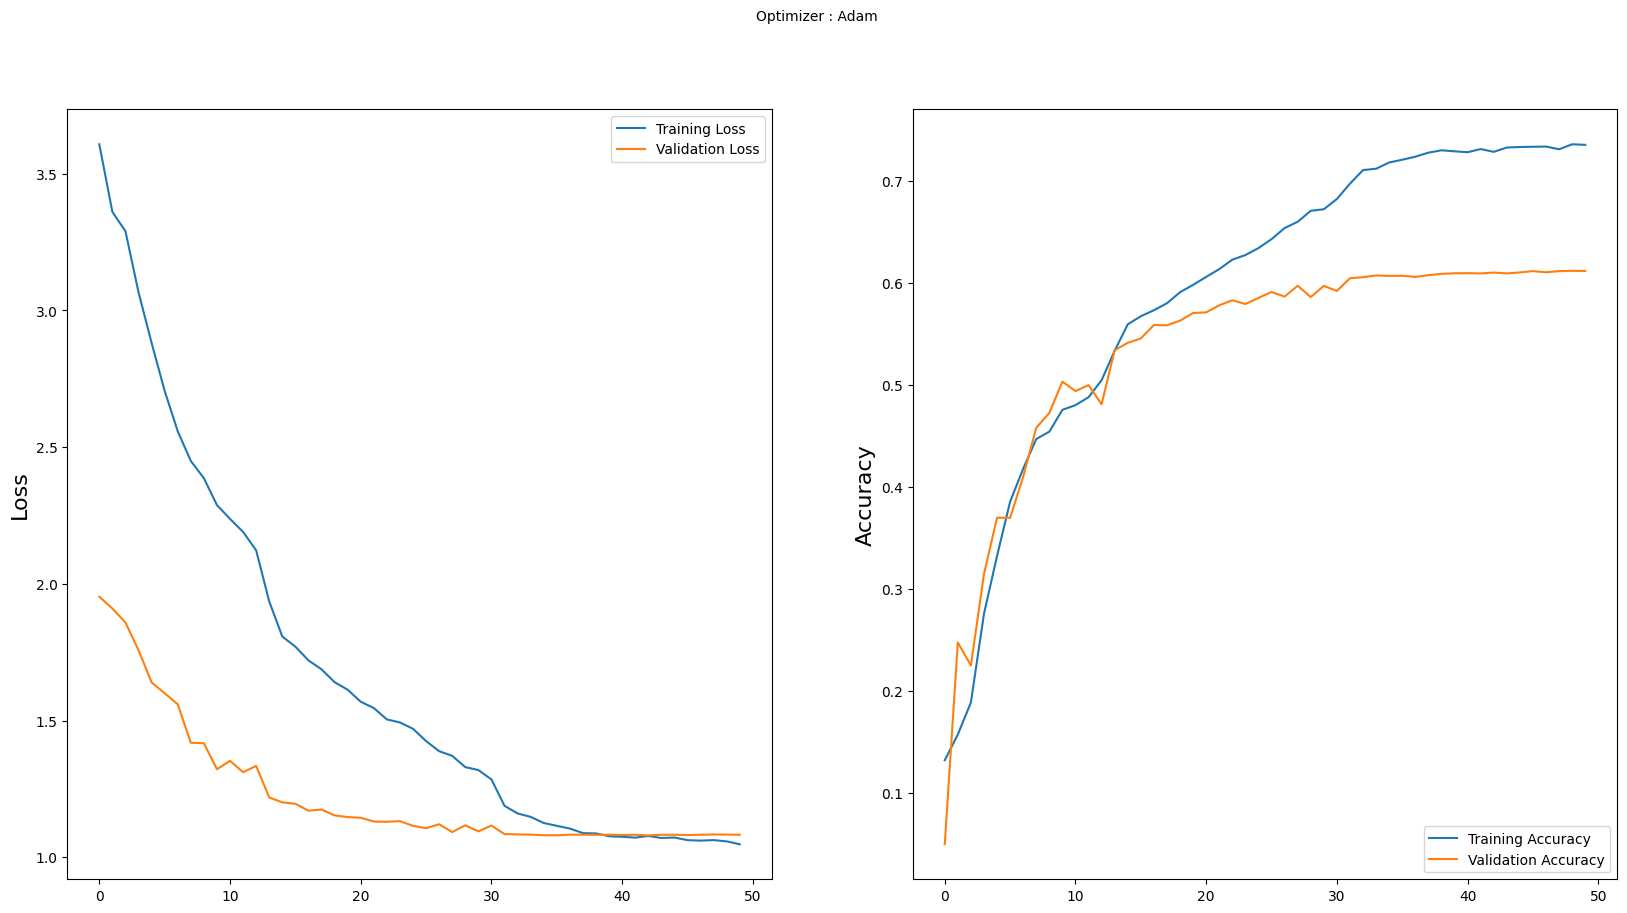

##EVALUATION

In [ ]:
results = model.evaluate(test_set)
preds   = model.predict(test_set)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

56/56 [==============================] - 6s 99ms/step - loss: 1.0808 - accuracy: 0.6127
The current model achieved a categorical accuracy of 61.27%!

##PREDICTIONS

In [ ]:

predictions = model.predict(test_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = test_set.class_indices.keys()

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

###COMPUTE CONFUSION MATRIX

In [ ]:

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

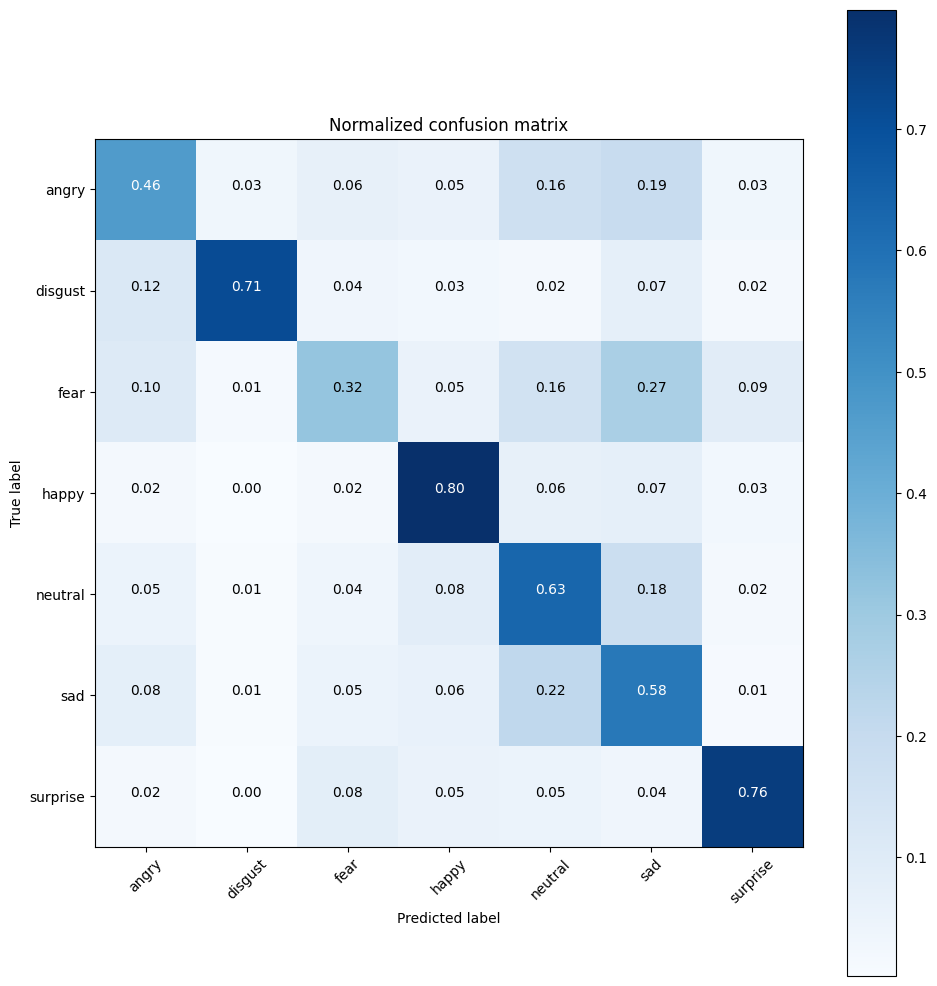

##INFERENCE

The model performance i.e. accuracy score was 61.27% on validation data. This is the highest among other models as CNN is best suited for multi-class image classification on complex datasets like FER2013.<br> However model accuracy is still lower. This may be because the human face can be a little bit confusing when expressing feelings specially surprise, neutral.<br>From the above visualization of confusion matrix also we can see that for surprise ,happy, disgust the true negative rate is high. So we have to the model is well trained for happy,disgust,surprise images.

# Naive Bayes

Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. Even if the features are interdependent, they are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.


## Data Preprocessing

Scaling (or standardization) of a dataset is a common requirement for many machine learning estimators: they might misbehave if the individual features do not more or less look like standard normally distributed data.

In [ ]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Model Building and Training 

Build different Naive Bayes classifiers and train it on a training dataset. After that, feed a random test sample to the model to get a predicted value.


### Training the model using Bernoulli Naive Bayes classifier


In [ ]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB
# initializaing the NB
classifer = BernoulliNB()
# training the model
classifer.fit(X_train, y_train)
# testing the model
y_pred = classifer.predict(X_test)

### Testing Accuracy of Bernoulli Naive Bayes Classifier

In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.21830593480078017


### Evaluation of Bernoulli Naive Bayes classifier

Let’s evaluate our Bernoulli Naive Bayes model using a confusion matrix that will visually help us see the number of correct and incorrect classified classes. First of all, we’ll visualize our model’s results. The predicted values are stored in a variable named y_pred, the target variable. We can also print the classification report, which will help us further evaluate our model’s performance.

Text(83.22222222222221, 0.5, 'Predicted label')

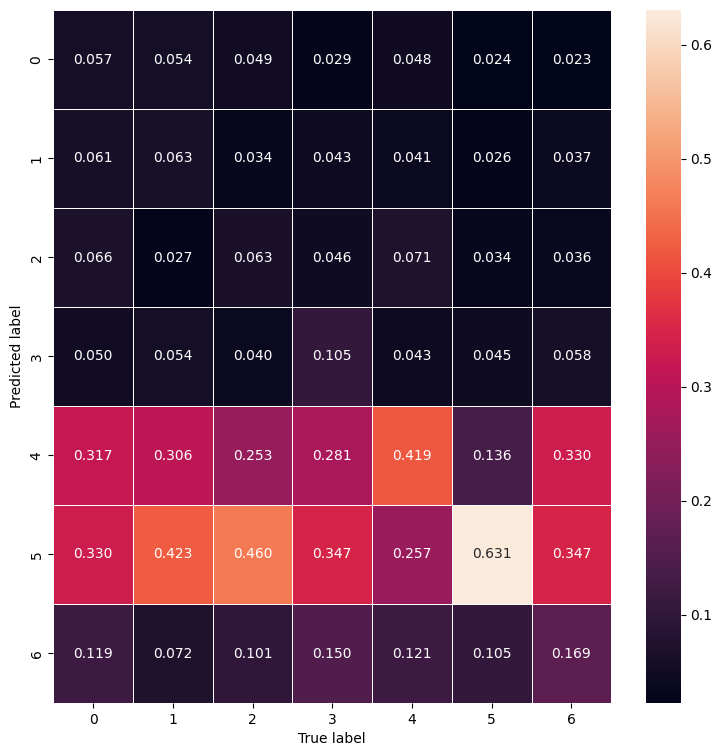

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, normalize="true")
# Plot the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat.T, annot=True, fmt=".3f", linewidths=.5)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [ ]:
# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.06      0.09       958
           1       0.02      0.06      0.03       111
           2       0.17      0.06      0.09      1024
           3       0.42      0.10      0.17      1774
           4       0.24      0.42      0.31      1247
           5       0.19      0.63      0.30       831
           6       0.22      0.17      0.19      1233

    accuracy                           0.22      7178
   macro avg       0.21      0.22      0.17      7178
weighted avg       0.26      0.22      0.19      7178



### Training model using Gaussian Naive Bayes Classifier

In [ ]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
classifer1 = GaussianNB()
# training the model
classifer1.fit(X_train, y_train)
# testing the model
y_pred1 = classifer1.predict(X_test)  

### Testing Accuracy of Gaussian Naive Bayes Classifier

We will not evolve the model on an unseen test dataset. First, we will predict the values for the test dataset and use them to calculate accuracy and F1 score. 


In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test,y_pred1))

0.22638617999442742


### Evaluation of Gaussian Naive Bayes Classifier

Let’s evaluate the Gaussian Naive Bayes model. The predicted values are stored in a variable named y_pred1.

Text(83.22222222222221, 0.5, 'Predicted label')

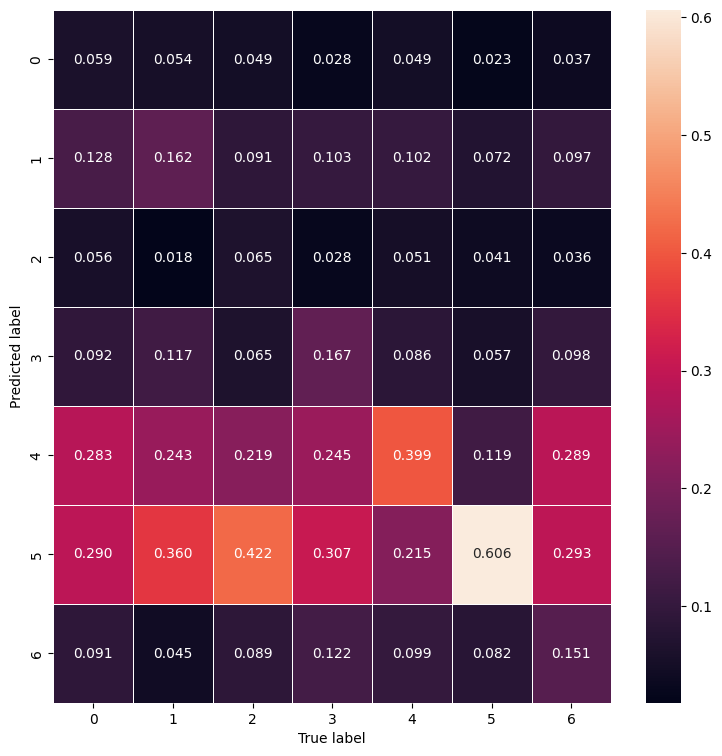

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred1, normalize="true")
# Plot the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat.T, annot=True, fmt=".3f", linewidths=.5)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [ ]:
# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.20      0.06      0.09       958
           1       0.02      0.16      0.04       111
           2       0.21      0.07      0.10      1024
           3       0.40      0.17      0.24      1774
           4       0.26      0.40      0.31      1247
           5       0.21      0.61      0.31       831
           6       0.24      0.15      0.18      1233

    accuracy                           0.23      7178
   macro avg       0.22      0.23      0.18      7178
weighted avg       0.27      0.23      0.21      7178



## Inference

Gaussian Naive Bayes Classifier has a higher accuracy (0.23) than Bernoulli Naive Bayes Classifier's accuracy (0.22).

From above we can conclude that the accuracy_score is low and all the confusion matrices suggests 4 and 5 are the only ones that have been classified correctly. 

Hence Naive Bayes cannot be used to classify the emotion detection dataset.

# kNN

In [ ]:
df = pd.read_csv("gdrive/MyDrive/fer2013.csv")

### Reading only training set from entire csv

In [ ]:
traindf = df[df['Usage']=='Training']

Training data: pixel matrices are data to process,<br>
target variable: emotion (an integer from 0 to 6)

In [ ]:
traindf.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
x_data = traindf['pixels']
y_data = traindf['emotion']

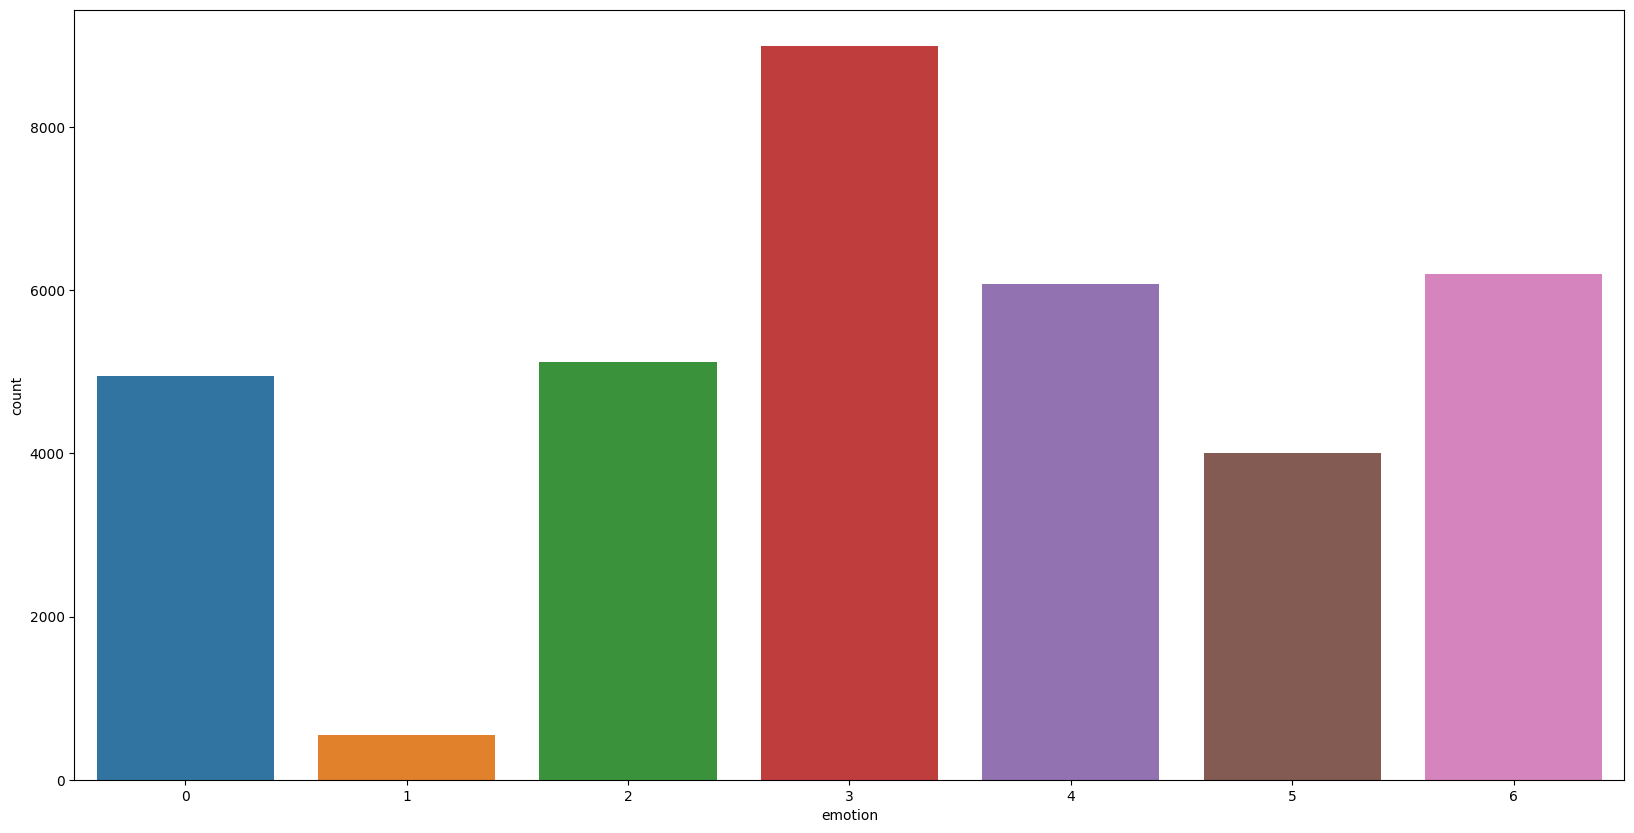

In [ ]:
ax = sns.countplot(x="emotion", data=df)


Inference: An imbalance of data is observed as some classes like 1 have very low instances while class 3 has more no. of instances

To overcome, we go for resampling the data by generating new data of minority classes and store it as new train dataset.

Resampling is done using RandomOverSampler, an oversampling method that balances out minority classes

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(50505, 1)   (50505,)


In [ ]:
x_data = pd.Series(x_data.flatten())
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data /= 255
x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [ ]:
y_data = np.array(y_data)

In [ ]:
x_data = x_data.reshape(-1, 48, 48, 1)
y_data = y_data.reshape(y_data.shape[0], 1)
x_data.shape,y_data.shape

((50505, 48, 48, 1), (50505, 1))

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("x_train: "+str(x_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

x_train: (45454, 48, 48, 1)
X_test: (2526, 48, 48, 1)
X_val: (2525, 48, 48, 1)
y_train: (45454, 1)
y_test: (2526, 1)
y_val: (2525, 1)


In [ ]:
from builtins import range
from builtins import object

num_training = x_train.shape[0]
mask = list(range(num_training))
X_train = x_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("x_train: "+str(x_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

x_train: (45454, 48, 48, 1)
X_test: (2526, 2304)
X_val: (2525, 2304)
y_train: (45454, 1)
y_test: (2526, 1)
y_val: (2525, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

Reshape 4D x_train np array (45454,48,48,1) into 2D array by taking row size as 45454 and columns as 48x48x1

In [ ]:
nsamples, nx, ny, nz = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny*nz))

In [ ]:
print("Val Accuracy for k=1")
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(d2_train_dataset, y_train)

Val Accuracy for k=1


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Calculate the accuracy of the model 
print("Accuracy of the model for validation dataset:")
print(classifier.score(X_val, y_val))

Accuracy of the model for validation dataset:
0.7572277227722772


In [ ]:
# Calculate the accuracy of the model 
print("Accuracy of the model for test dataset:")
print(classifier.score(X_test, y_test))

Accuracy of the model for test dataset:
0.7743467933491687


In [ ]:
# Calculate the accuracy of the test FER dataset
testdf = df[df['Usage']=='PublicTest']
# testdf.head()
X_test = testdf['pixels']
y_test = testdf['emotion']
oversamp = RandomOverSampler(sampling_strategy='auto')
Xt, yt = oversamp.fit_resample(X_test.values.reshape(-1,1), y_test)
Xt = pd.Series(Xt.flatten())
x_test = np.array(list(map(str.split, Xt)), np.float32)
x_test /= 255
Y_test = np.array(yt)
x_test = x_test.reshape(-1, 48, 48, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

nsamp, nxt, nyt, nzt = x_test.shape
x_test = x_test.reshape((nsamp,nxt*nyt*nzt))

x_test.shape,Y_test.shape


((6265, 2304), (6265, 1))

In [ ]:
print("Accuracy of the model for test dataset:")
print(classifier.score(x_test, Y_test))

Accuracy of the model for test dataset:
0.4244213886671987


Using SKLEARN


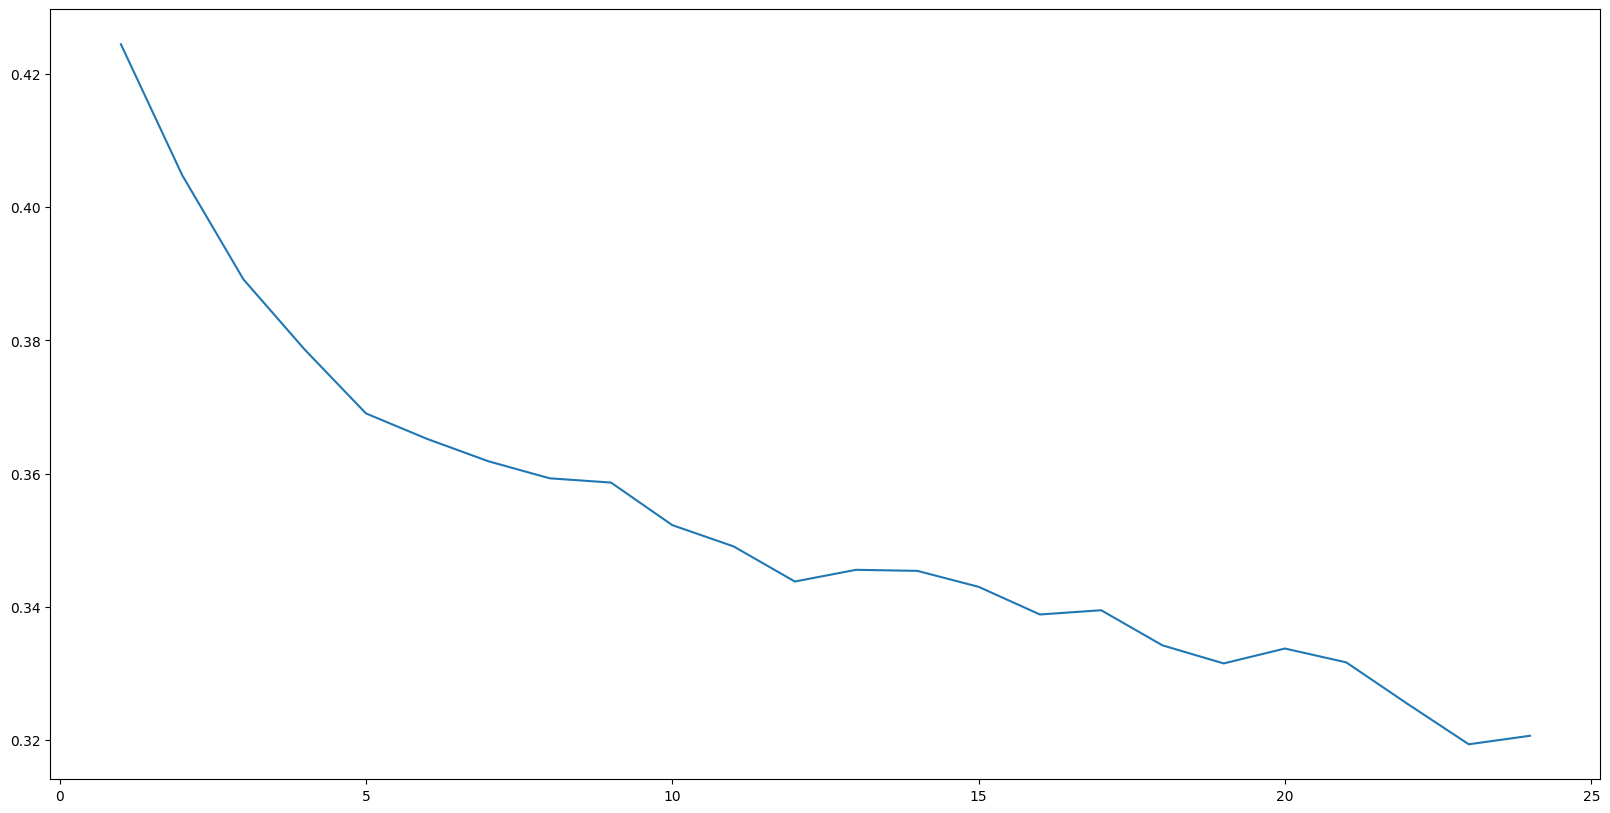

max acc at k=1 acc of 0.4244213886671987


In [ ]:
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
for k in range(1, 25):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(d2_train_dataset, y_train)
    liy.append(neigh.score(x_test, Y_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

Using SKLEARN


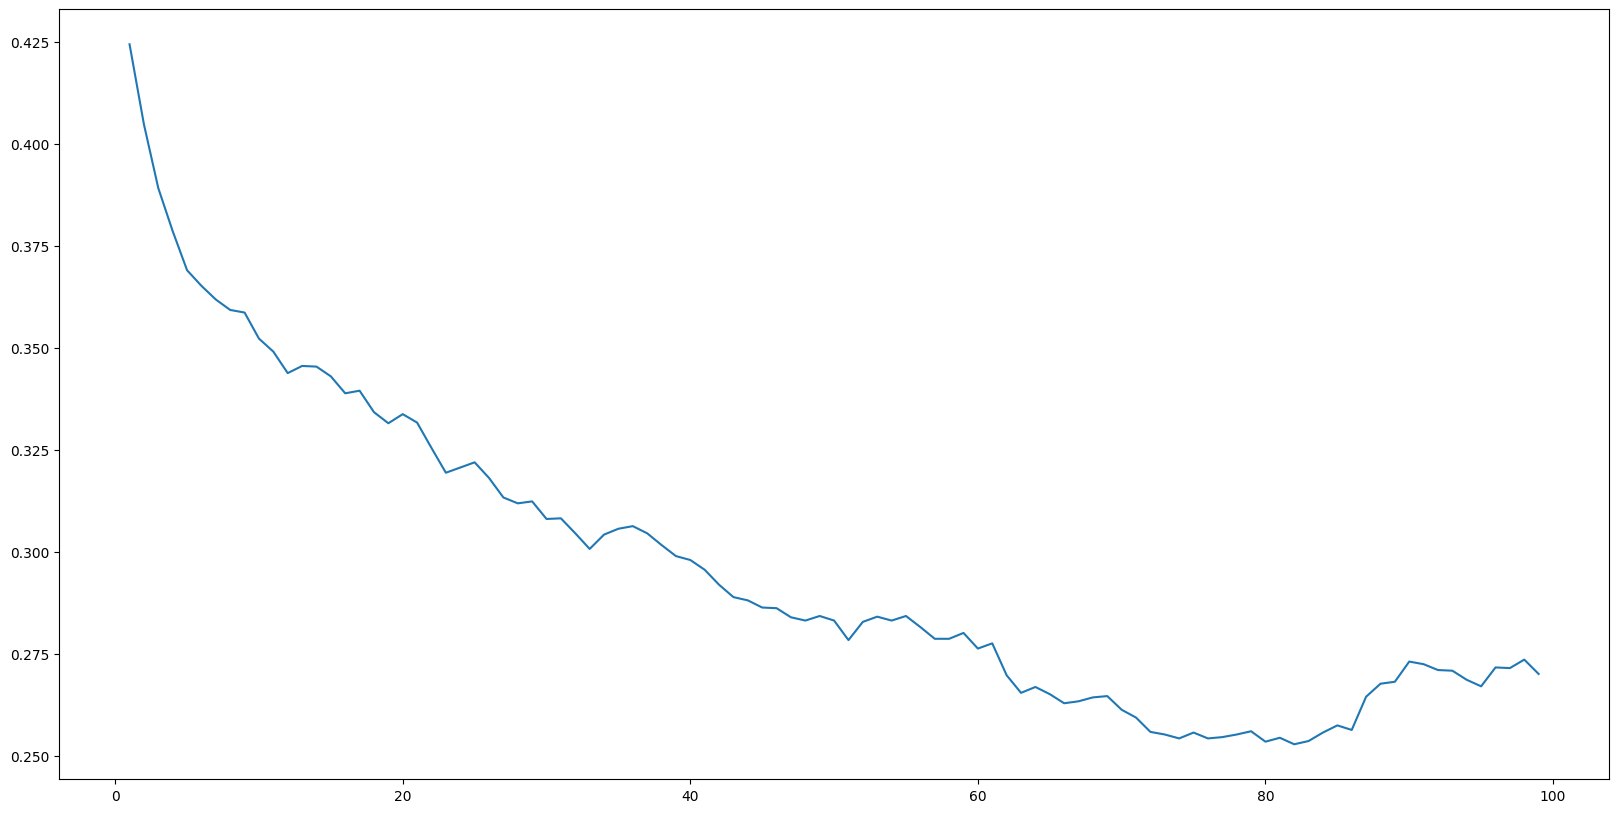

max acc at k=1 acc of 0.4244213886671987


In [ ]:
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(d2_train_dataset, y_train)
    liy.append(neigh.score(x_test, Y_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

Inference: The best k value was 1 for which the accuracy is 42.4%. This is pretty good for a naive ML algorithm run on a complex multi-class dataset

## Multivariate classification & prediction with kNN using OneVsRestClassifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

Splitting training dataset and training with 75% of dataset

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.25, random_state=0)
ns, nx, ny, nz = X_train2.shape
X_train2 = X_train2.reshape(ns,nx*ny*nz)
nst2, nxt2, nyt2, nzt2 = X_test2.shape
X_test2 = X_test2.reshape(nst2,nxt2*nyt2*nzt2)

OVR classifier is used here as we want multi-class classification by considering the classes as a binary superset by taking one classes vs the rest in turn as<br>[0] vs [1,2,3,4,5,6]<br>[1] vs [0,2,3,4,5,6]<br>[2] vs [0,1,3,4,5,6] and so on.

kNN can be used without OvR here as it is generally successful with multiclass classification however it works by majority voting strategy and we would like to try the OvR here

In [ ]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [ ]:
knn.fit(X_train2,y_train2)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
knn.predict(X_test2[0].reshape(1,-1))

array([6])

In [ ]:
y_test2[0]

array([5])

In [ ]:
knn.predict(X_test2[:10].reshape(10,-1))

array([6, 4, 2, 2, 6, 1, 1, 6, 3, 1])

In [ ]:
y_test2[:10].reshape(1,10)

array([[5, 6, 2, 5, 0, 1, 1, 0, 4, 1]])

In [ ]:
knn.predict(x_test[0].reshape(1,-1))

array([6])

In [ ]:
Y_test[0]

array([0])

In [ ]:
knn.predict(x_test[:10].reshape(10,-1))

array([6, 1, 0, 4, 4, 6, 6, 6, 5, 6])

In [ ]:
Y_test[:10].reshape(1,10)

array([[0, 1, 4, 6, 3, 3, 2, 0, 2, 0]])

### Prediction for original test dataset (x_test and Y_test)

In [ ]:
predictions_test = knn.predict(x_test)

In [ ]:
%time
print('KNN Accuracy: %.3f' % accuracy_score(Y_test,predictions_test))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
KNN Accuracy: 0.360


Text(0.5, 1.0, 'Accuracy Score: 0.3600957701516361')

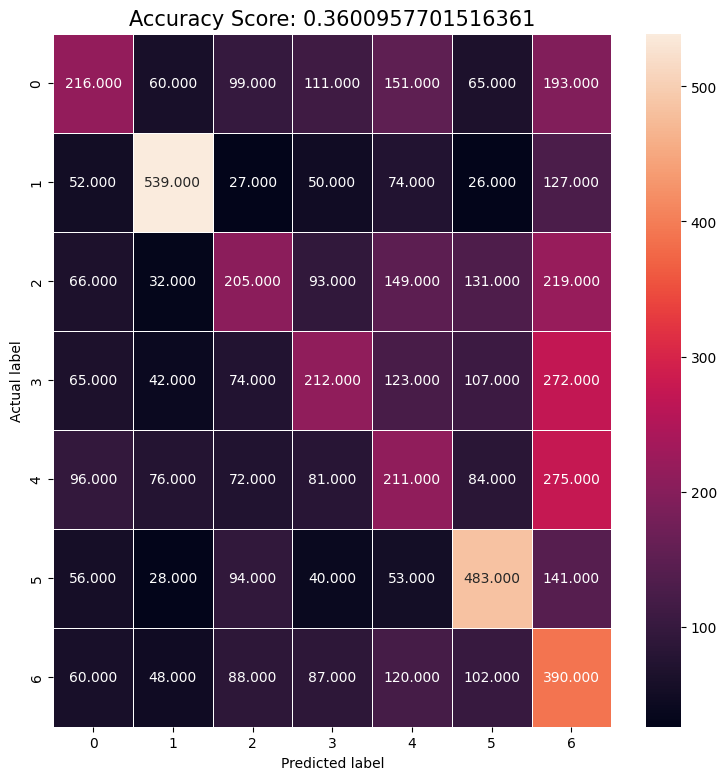

In [ ]:
conf = confusion_matrix(Y_test,predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(conf,annot=True, fmt='.3f', linewidths=.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(Y_test,predictions_test))
plt.title(all_sample_title,size=15)

### Prediction and confusion matrix for sub-training dataset (X_test2 and y_test2)

In [ ]:
predictions = knn.predict(X_test2)

In [ ]:
%time
print('KNN Accuracy: %.3f' % accuracy_score(y_test2,predictions))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
KNN Accuracy: 0.511


Text(0.5, 1.0, 'Accuracy Score: 0.5106517779361686')

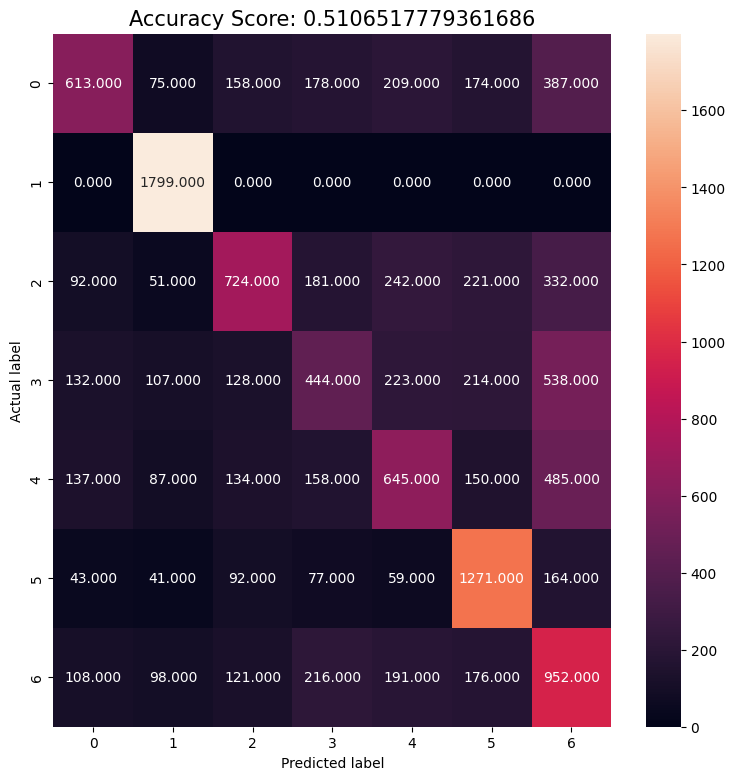

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

# MLP

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Input, Concatenate, Reshape
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

Load dataset

In [ ]:
# Load the Fer2013 dataset from the CSV file
df = pd.read_csv('gdrive/MyDrive/emotion.csv')

In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Preprocessing

In [ ]:
X_train=np.array([np.fromstring(x, dtype=int, sep=" ") for x in df.loc[df["Usage"]=="Training", "pixels"] ])
X_test=np.array([np.fromstring(x, dtype=int, sep=" ") for x in df.loc[df["Usage"]=="PublicTest", "pixels"] ])
X_val=np.array([np.fromstring(x, dtype=int, sep=" ") for x in df.loc[df["Usage"]=="PrivateTest", "pixels"] ])
y_train=np.array(df.loc[df["Usage"]=="Training", "emotion"])
y_test=np.array(df.loc[df["Usage"]=="PublicTest", "emotion"])
y_val=np.array(df.loc[df["Usage"]=="PrivateTest", "emotion"])

In [ ]:
print("Train shape", X_train.shape)
print("Validation shape",X_val.shape)
print("Test shape",X_test.shape)

Train shape (28709, 2304)
Validation shape (3589, 2304)
Test shape (3589, 2304)


## MLP using MLPclassifier

In [ ]:
X_train

array([[ 70,  80,  82, ..., 106, 109,  82],
       [151, 150, 147, ..., 193, 183, 184],
       [231, 212, 156, ...,  88, 110, 152],
       ...,
       [ 74,  81,  87, ..., 188, 187, 187],
       [222, 227, 203, ..., 136, 136, 134],
       [195, 199, 205, ...,   6,  15,  38]])

In [ ]:
y_train

array([0, 0, 2, ..., 4, 0, 4])

In [ ]:
len(y_test)
len(y_val)

3589

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6])

Build MLP with hidden layer size as 128 with relu activation function

In [ ]:
model=MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=300)

In [ ]:
# Train the MLP model
history = model.fit(X_train,y_train)

In [ ]:
# Evaluate the MLP model on the test set
y_pred=model.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.24965171356923935


In [ ]:
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 24.97%


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[  1,   0,   0, 465,   0,   0,   1],
       [  0,   0,   0,  56,   0,   0,   0],
       [  0,   0,   0, 496,   0,   0,   0],
       [  0,   0,   0, 895,   0,   0,   0],
       [  0,   0,   0, 653,   0,   0,   0],
       [  1,   0,   0, 414,   0,   0,   0],
       [  0,   0,   0, 607,   0,   0,   0]])

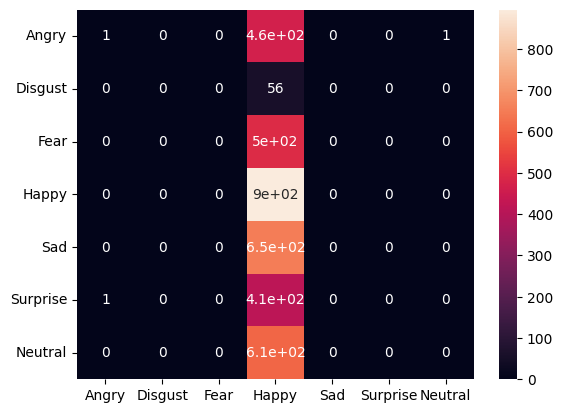

In [ ]:
label=['Angry','Disgust', 'Fear','Happy', 'Sad','Surprise', 'Neutral']
sns.heatmap(cnf_matrix, annot=True, xticklabels=label,yticklabels=label)
plt.show()

## MLP with defined layers

Convert image to 48 x 48 size and split it into test, train and validation

In [ ]:
def parse_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image=np.fromstring(df.loc[row, 'pixels'], dtype=int, sep=' ')
        image=np.reshape(image, (48, 48, 1))
        image_array[i]=image
        
    return image_array, image_label

# Splitting the data into train, validation and testing set thanks to Usage column
udf_X_train,udf_y_train=parse_data(df[df["Usage"] == "Training"])
udf_X_val,udf_y_val=parse_data(df[df["Usage"] == "PrivateTest"])
udf_X_test,udf_y_test=parse_data(df[df["Usage"] == "PublicTest"])

In [ ]:
udf_X_train =udf_X_train/ 255.0
udf_X_test =udf_X_test/ 255.0
udf_X_val =udf_X_val/ 255.0

In [ ]:
udf_X_train

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

In [ ]:
udf_y_train

array([0, 0, 2, ..., 4, 0, 4])

Convert integer class labels to one-hot encoded labels

In [ ]:
udf_y_train=np_utils.to_categorical(udf_y_train,num_classes=7)
udf_y_test=np_utils.to_categorical(udf_y_test,num_classes=7)
udf_y_val=np_utils.to_categorical(udf_y_val,num_classes=7)
udf_y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Model with 7 layers each for one emotion

In [ ]:
# Define the MLP model architecture
model = Sequential()
model.add(Flatten(input_shape=(48, 48, 1)))
# Add a user-defined Dense layer with 1024 neurons and ReLU activation
model.add(Dense(1024, input_shape=(48*48,), activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a user-defined Dense layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a user-defined Dense layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a user-defined Dense layer with 7 neurons (one for each emotion) and softmax activation
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 1024)              2360320   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Only model 

In [ ]:
# Train the MLP model
history = model.fit(udf_X_train,udf_y_train, epochs=5, batch_size=128, validation_data=(udf_X_val, udf_y_val))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
225/225 [==============================] - 56s 244ms/step - loss: 1.8902 - accuracy: 0.2303 - val_loss: 1.8155 - val_accuracy: 0.2449
Epoch 2/5
225/225 [==============================] - 39s 172ms/step - loss: 1.8137 - accuracy: 0.2510 - val_loss: 1.8153 - val_accuracy: 0.2449
Epoch 3/5
225/225 [==============================] - 39s 175ms/step - loss: 1.8139 - accuracy: 0.2513 - val_loss: 1.8156 - val_accuracy: 0.2449
Epoch 4/5
225/225 [==============================] - 38s 167ms/step - loss: 1.8132 - accuracy: 0.2513 - val_loss: 1.8151 - val_accuracy: 0.2449
Epoch 5/5
225/225 [==============================] - 39s 174ms/step - loss: 1.8126 - accuracy: 0.2513 - val_loss: 1.8151 - val_accuracy: 0.2449


In [ ]:
score = model.evaluate(udf_X_test, udf_y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8119206428527832
Test accuracy: 0.24937307834625244


In [ ]:
y_pred=model.predict(udf_X_test)
y_pred

113/113 [==============================] - 2s 15ms/step


array([[0.1438929 , 0.01373328, 0.14608377, ..., 0.16815981, 0.11189209,
        0.17348632],
       [0.1438929 , 0.01373328, 0.14608377, ..., 0.16815981, 0.11189209,
        0.17348632],
       [0.1438929 , 0.01373328, 0.14608377, ..., 0.16815981, 0.11189209,
        0.17348632],
       ...,
       [0.14389291, 0.01373328, 0.14608379, ..., 0.16815983, 0.1118921 ,
        0.17348635],
       [0.14389291, 0.01373328, 0.14608379, ..., 0.16815983, 0.1118921 ,
        0.17348635],
       [0.14389291, 0.01373328, 0.14608379, ..., 0.16815983, 0.1118921 ,
        0.17348635]], dtype=float32)

In [ ]:
y_test

array([0, 1, 4, ..., 4, 4, 4])

In [ ]:
y_pred=np_utils.to_categorical(y_pred,num_classes=7)
y_pred

array([[[[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
    

COnvert one-hot encoded labels back to label classes

In [ ]:
y_pred_labels=np.argmax(y_pred,axis=1)
y_pred_labels

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_labels=np.argmax(udf_y_test,axis=1)
y_test_labels

array([0, 1, 4, ..., 4, 4, 4])

In [ ]:
cnf_matrix = metrics.multilabel_confusion_matrix(y_test_labels, y_pred_labels) 
cnf_matrix 

In [ ]:
label=['Angry','Disgust', 'Fear','Happy', 'Sad','Surprise', 'Neutral']
sns.heatmap(cnf_matrix, annot=True, xticklabels=label,yticklabels=label)
plt.show()

In [ ]:
print(accuracy_score(y_test_labels, y_pred_labels))

0.24937308442463083


### Model with Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1)

# Fit the generator on the training set
datagen.fit(udf_X_train)

# Create an iterator for the training set with data augmentation
train_iterator = datagen.flow(udf_X_train, udf_y_train, batch_size=32)

In [ ]:
model.fit(train_iterator, epochs=10)

Epoch 1/10
898/898 [==============================] - 65s 71ms/step - loss: 1.8774 - accuracy: 0.2388
Epoch 2/10
898/898 [==============================] - 61s 68ms/step - loss: 1.8149 - accuracy: 0.2511
Epoch 3/10
898/898 [==============================] - 57s 63ms/step - loss: 1.8135 - accuracy: 0.2509
Epoch 4/10
898/898 [==============================] - 55s 61ms/step - loss: 1.8122 - accuracy: 0.2510
Epoch 5/10
898/898 [==============================] - 55s 61ms/step - loss: 1.8118 - accuracy: 0.2513
Epoch 6/10
898/898 [==============================] - 56s 62ms/step - loss: 1.8121 - accuracy: 0.2511
Epoch 7/10
898/898 [==============================] - 54s 60ms/step - loss: 1.8119 - accuracy: 0.2514
Epoch 8/10
898/898 [==============================] - 53s 59ms/step - loss: 1.8117 - accuracy: 0.2514
Epoch 9/10
898/898 [==============================] - 54s 61ms/step - loss: 1.8109 - accuracy: 0.2513
Epoch 10/10
898/898 [==============================] - 55s 61ms/step - loss: 1.812

In [ ]:
y_pred=model.predict(udf_X_test)
y_pred

113/113 [==============================] - 2s 13ms/step


array([[0.14297411, 0.01871246, 0.14698985, ..., 0.16273725, 0.11481114,
        0.1737002 ],
       [0.14297411, 0.01871246, 0.14698985, ..., 0.16273725, 0.11481114,
        0.1737002 ],
       [0.14297411, 0.01871246, 0.14698985, ..., 0.16273725, 0.11481114,
        0.1737002 ],
       ...,
       [0.14297412, 0.01871246, 0.14698987, ..., 0.16273725, 0.11481114,
        0.17370021],
       [0.14297412, 0.01871246, 0.14698987, ..., 0.16273725, 0.11481114,
        0.17370021],
       [0.14297412, 0.01871246, 0.14698987, ..., 0.16273725, 0.11481114,
        0.17370021]], dtype=float32)

In [ ]:
y_pred_labels=np.argmax(y_pred,axis=1)
y_pred_labels

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
cnf_matrix = metrics.multilabel_confusion_matrix(y_test, y_pred_labels) 
cnf_matrix 

array([[[3122,    0],
        [ 466,    1]],

       [[3533,    0],
        [  56,    0]],

       [[3093,    0],
        [ 496,    0]],

       [[   1, 2693],
        [   0,  895]],

       [[2936,    0],
        [ 653,    0]],

       [[3174,    0],
        [ 415,    0]],

       [[2982,    0],
        [ 607,    0]]])

In [ ]:
print(accuracy_score(y_test, y_pred_labels))

0.24965171356923935


Inference: MLP algorithm has a constant accuracy of 25% in all models executed indicating it is the highest possible accuracy that can be acheived

# K-Means


## PCA

 PCA is a famous unsupervised dimensionality reduction technique that comes to our rescue whenever the curse of dimensionality haunts us.

Working with image data is a little different than the usual datasets.

Our dataset consists of grayscale images. A grayscale image does not contain color but only shades of gray. The pixel intensity in a grayscale image varies from black (0 intensity) to white (255 full intensity) to make it what we usually call as a Black & White image.

### Reduce Image Dimensions

Now, using PCA, let’s reduce the image dimensions to just 2.

We have used the sklearn.decomposition provides PCA() class to implement principal component analysis algorithm.

It accepts integer number as an input argument depicting the number of principal components we want in the converted dataset. 

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(2) # we need 2 principal components.
converted_data = pca.fit_transform(data)
 
converted_data.shape

(35887, 2)

### Visualize the Resulting Dataset

We can visualize the dataset using a Scatterplot.

<ipython-input-53-bea64284f2f2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-53-bea64284f2f2>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


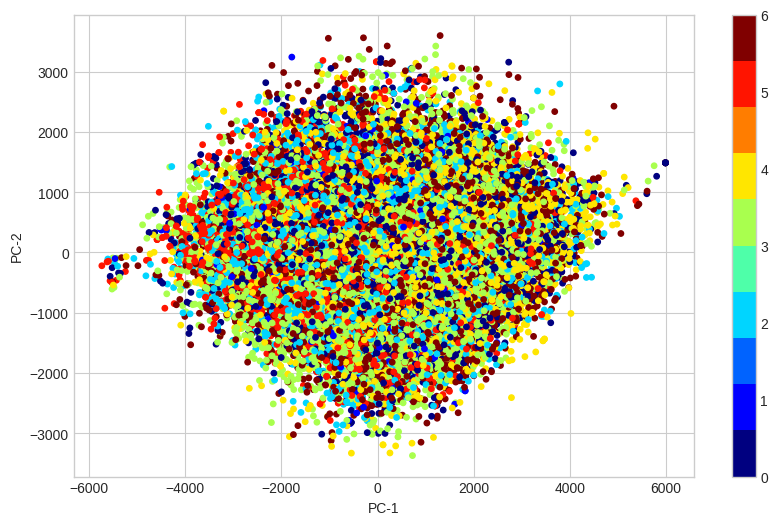

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1],  s = 15, cmap = c_map , c = target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

### Inference:
The scatterplot is not showing distinctive boundary and therefore it needs a more complicated model such as neural network to classify.

Although this inference will be true while using k-means too, we still analyse its performance and find the optimal k value

## Minibatch K-means for performance analysis

Mini-batch k-means uses the idea of taking random smaller samples from our original high-dimensional dataset and applying k-means clustering<br>The clusters are updated with a different portion of the dataset in each iteration

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
total_clusters = len(np.unique(Y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=7)

In [ ]:
kmeans.labels_

array([5, 1, 1, ..., 4, 1, 0], dtype=int32)

In [ ]:
len(kmeans.labels_)

37878

In [ ]:
len(X_train2)

37878

We infer that each data point in X_train2 has been labeled by k-means and the labels are stored in kmeans.labels_

In [ ]:
def retrieve_info(cluster_labels,y_train):
    '''
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    '''
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        if y_train.size: # Check for emptiness and None
          num = np.bincount(y_train[index==1]).argmax() # Find the highest probability label
          reference_labels[i] = num
    return reference_labels

In [ ]:
ref_labels = retrieve_info(kmeans.labels_,y_train2.flatten('C'))
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = ref_labels[kmeans.labels_[i]]

In [ ]:
number_labels[:20].astype(int)

array([6, 5, 5, 2, 2, 4, 2, 2, 3, 5, 4, 2, 6, 4, 5, 3, 6, 4, 4, 5])

In [ ]:
y_train2[1:20].reshape(1,19)

array([[6, 3, 5, 6, 3, 5, 4, 0, 2, 5, 5, 5, 0, 6, 4, 6, 4, 0, 2]])

In [ ]:
print(accuracy_score(number_labels,y_train2))

0.19578647235862506


We get a low accuracy of 19.5% on training sub-dataset. To improve it, we go for modifying k values i.e. no. of clusters assumed

In [ ]:
from sklearn.metrics import homogeneity_score

We optimize k-means using 3 performance metrics: Accuracy, Inertia and Homogeneity score<br>**Accuracy** score is the percentage of correctly predicted values.<br>**Inertia** is a measure of how internally coherent clusters are. It is inversely proportional to sum of squares of distances between data points and their respective cluster’s centroid. Higher the number of clusters, lower is the inertia score.<br>**Homogeneity** score is a measure of data points of a particular cluster belonging to a single class.

In [ ]:
def calculate_metrics(model,output):
  print('Number of clusters is {}'.format(model.n_clusters))
  print('Inertia : {}'.format(model.inertia_))
  print('Homogeneity : {}'.format(homogeneity_score(output,model.labels_)))

In [ ]:
cluster_number = [4,8,10,13,20,36,48,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test2))

    kmeans = MiniBatchKMeans(n_clusters = i)

    kmeans.fit(X_train2)
    
    calculate_metrics(kmeans,y_train2.flatten('C'))

    reference_labels = retrieve_info(kmeans.labels_,y_train2.flatten('C'))

    number_labels = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
 
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train2)))
    print()

Number of clusters is 4
Inertia : 3877825.5
Homogeneity : 0.013550036901865129
Accuracy score : 0.1926976081102487

Number of clusters is 8
Inertia : 3497851.25
Homogeneity : 0.017261314230683125
Accuracy score : 0.19998415967052113

Number of clusters is 10
Inertia : 3383480.5
Homogeneity : 0.018805556423197114
Accuracy score : 0.20038016790749247

Number of clusters is 13
Inertia : 3282949.0
Homogeneity : 0.020441029810177355
Accuracy score : 0.20420824753154865

Number of clusters is 20
Inertia : 3111492.5
Homogeneity : 0.023589479873704355
Accuracy score : 0.20901314747346744

Number of clusters is 36
Inertia : 2940026.0
Homogeneity : 0.028587897853857003
Accuracy score : 0.21796293362901947

Number of clusters is 48
Inertia : 2864481.5
Homogeneity : 0.034793271552809174
Accuracy score : 0.22514388299276625

Number of clusters is 64
Inertia : 2770362.5
Homogeneity : 0.03929392416349252
Accuracy score : 0.23187602302127885

Number of clusters is 144
Inertia : 2578718.75
Homogeneity 

Inference: The highest accuracy is returned by no. of clusters taken as 256 at 29%<br>We also notice inertia parameter decreases as no. of clusters reaches best possible. This is because distance (SSD) decreases between pixel data and centroids <br>

Other inferences: Accuracy scores increases as no. of clusters increase and homogeneity score as clusters become more and more differentiable

In [ ]:
# Testing model on testing sub-dataset (X_test2 and y_test2) for k=256

kmeans = MiniBatchKMeans(n_clusters = 256)

kmeans.fit(X_test2)
calculate_metrics(kmeans,y_test2.flatten('C'))
ref_labels = retrieve_info(kmeans.labels_,y_test2.flatten('C'))
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = ref_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test2)))
print()

Number of clusters is 256
Inertia : 799935.25
Homogeneity : 0.125900051754282
Accuracy score : 0.3009424249623822



Thus, we have improved the original accuracy from 19.5% to 30%

### Inference:
As concluded by PCA, we understand that k-means is not a suitable clustering method to find the classes of FER dataset by seeing the low accuracy score when compared with original labels.
<br>We also notice that the no. of classes according to our benchmark labeled dataset was 7 but k-means provided a highest accuracy for no. of clusters as 256. This shows that k-means groups the images based on different features such as orientation of the face or similar structure.